# Perez Group Presentation 4/12/2023 Plots

In [9]:
library(dplyr, warn.conflicts = FALSE)
library(mvtnorm)
library(ggplot2)
library(concaveman)
library(sf)
library(sfheaders)
library(ismev)

In [26]:
mesh <- seq(-4, 4, length.out=1000)
mu <- 0
sd <- 1
dens <- dnorm(mesh, mean=mu, sd=sd)
p <- 0.005
quantile <- qnorm(1-p)
dat <- data.frame(mesh=mesh, dens=dens)

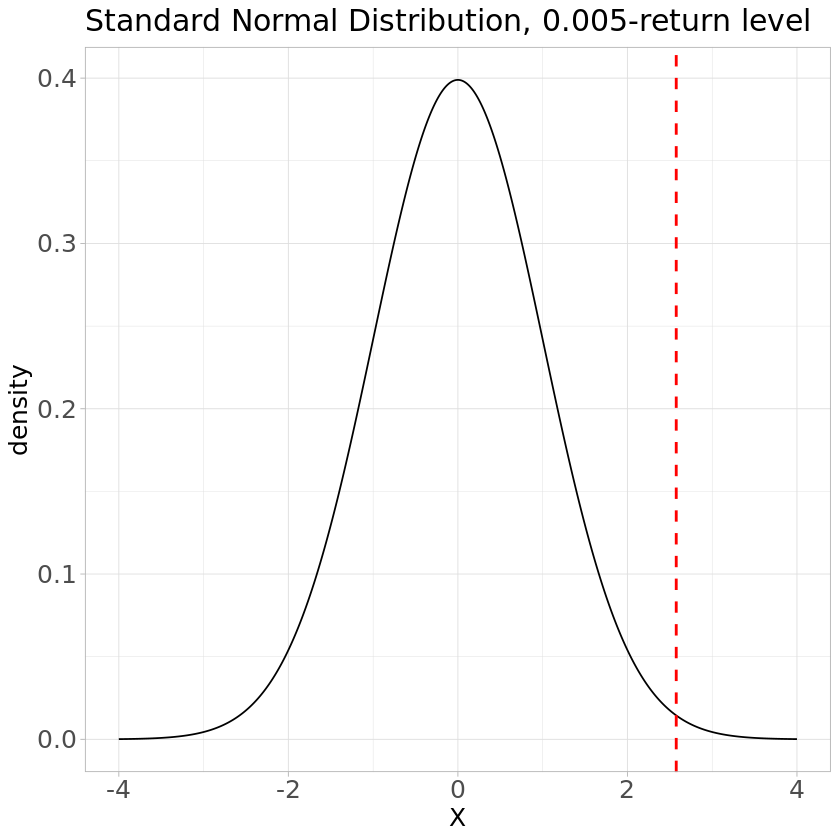

In [82]:
ggplot(dat) + geom_line(aes(x=mesh, y=dens)) + 
geom_vline(aes(xintercept=quantile), color='red', linetype='dashed', linewidth=0.8) + 
xlab('X') + ylab('density') + 
ggtitle('Standard Normal Distribution, 0.005-return level') + theme_light() + theme( 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), text = element_text(size = 15))

In [44]:
grid <- expand.grid(X1=seq(-5, 5, length.out=500), X2=seq(-5, 5, length.out=500))
dens <- apply(grid, 1, dmvnorm, mean=rep(0,2), sigma=matrix(c(1,0.7,0.7,1), nrow=2))

In [53]:
density_res <- cbind(grid, dens)

In [46]:
survfunc <- apply(grid, 1, pmvnorm, upper=Inf, mean=rep(0,2), sigma=matrix(c(1,0.7,0.7,1), nrow=2))

In [64]:
isoline <- grid[survfunc > p - 0.0001 & survfunc < p + 0.0001,]

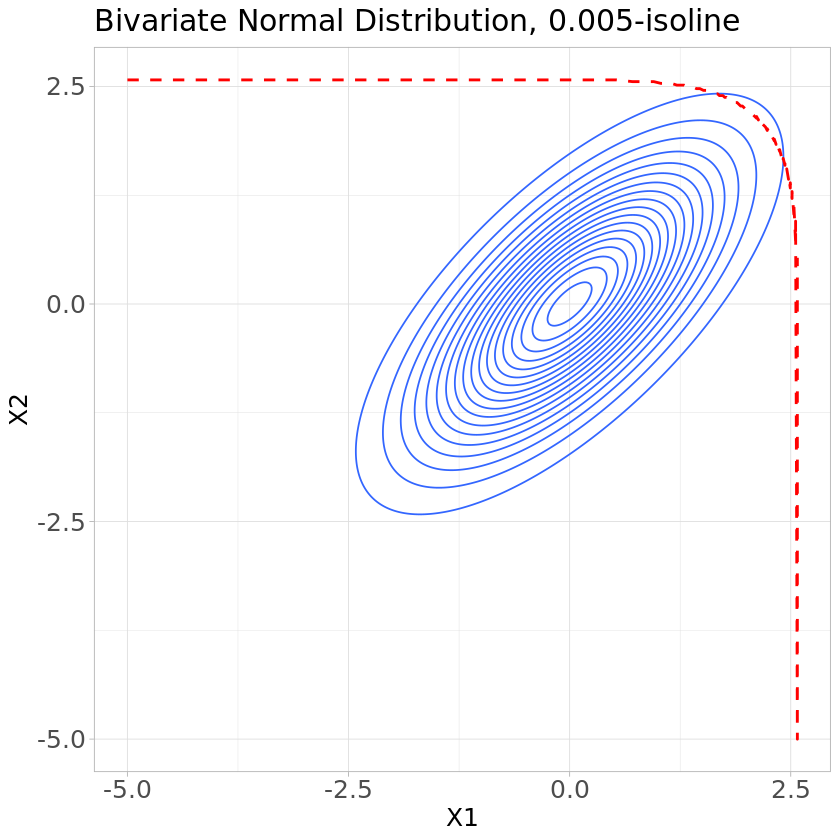

In [79]:
ggplot() + geom_contour(dat=density_res, aes(x=X1, y=X2, z=dens), bins=20) + geom_line(dat=isoline, aes(x=X1, y=X2), col='red', linetype='dashed', linewidth=0.8) + ggtitle('Bivariate Normal Distribution, 0.005-isoline') + theme_light() + theme( 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), text = element_text(size = 15))




## Coverage Results to Share

### Bivariate t

In [2]:
load_path_bivt <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create/bivt/500gticks_-2lb_5ub_rollingwindow/n1000|5000|10000|15000|25000_pp0.25|p0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|beta0.333333333333333.RData'
res_bivt <- readRDS(load_path_bivt)
#res_bivt %>% filter(beta_func=='0.5') %>% group_by(alpha, n, p) %>% summarize(coverage=mean(covered)) %>% ungroup() %>% arrange(as.integer(n))



In [3]:
#res_bivt %>% filter(beta_func=='0.5') %>% filter(p=='0.25', alpha==0.05) %>% group_by(n) %>% summarize(coverage=mean(covered)) %>% ungroup() %>% arrange(as.integer(n))

### Bivariate Gaussian

In [4]:
load_path_bivgauss <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create/bivgauss/500gticks_-2lb_5ub_rollingwindow/n1000|5000|10000|15000|25000_pp0.25|p0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|beta0.333333333333333.RData'
res_bivgauss <- readRDS(load_path_bivgauss)
#res_bivgauss %>% filter(beta_func=='0.5') %>% filter(p!=0.1)%>% group_by(n, alpha, p) %>% summarize(coverage=mean(covered)) %>% ungroup() %>% arrange(as.integer(n))

## Projection Example

In [10]:
lb <- -2
ub <- 5
grid <- expand.grid(X1=seq(lb, ub, length.out=500),
                    X2=seq(lb, ub, length.out=500))
true_surv <- apply(grid, 1, pmvt, upper = c(Inf, Inf), df = 4, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2))

In [11]:
ps <- c(0.01, 0.05, 0.5, 0.25)
tols <- c(0.00005, 0.0003, 0.001, 0.0015)
isolines <- list()
for (i in 1:length(ps)) {
    p <- ps[i]
    tol <- tols[i]
    isolines[[as.character(p)]]$C <- grid[true_surv <= p,]
    isolines[[as.character(p)]]$Cminus <- grid[true_surv < p,]
    isolines[[as.character(p)]]$isoline <- grid[p - tol <= true_surv & true_surv <= p + tol,]
}

Warning message:
“Removed 103 rows containing missing values (geom_point).”


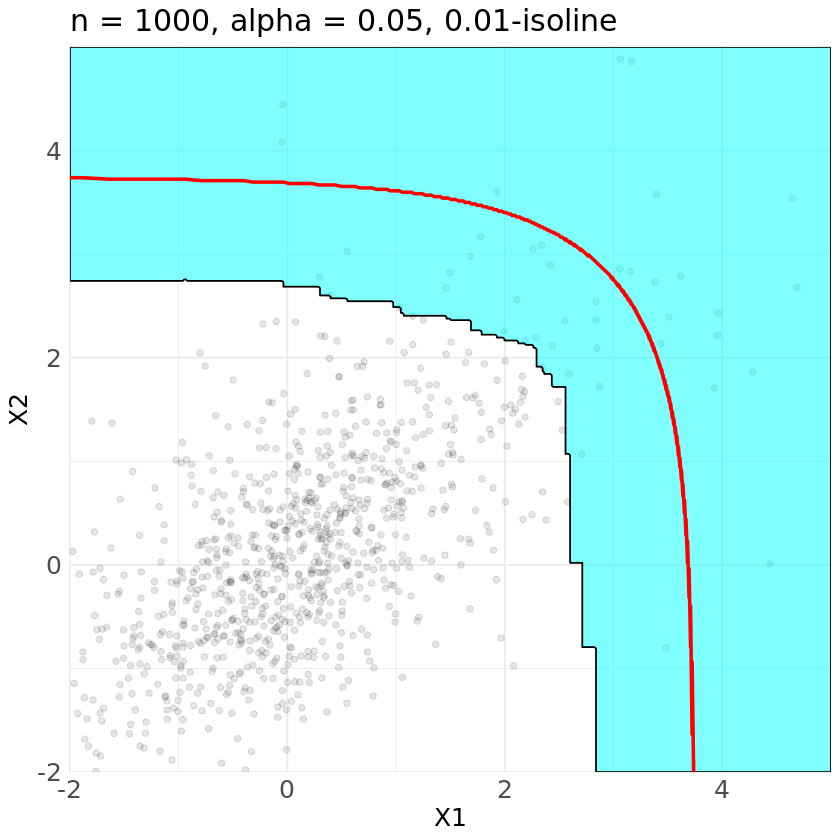

In [81]:
confregpath <- '/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create/bivt/500gticks_-2lb_5ub_rollingwindow/1000n_500B_500gticks_-2lb_5ub_bivt_empirical/simulation_4.RData'
confreg <- readRDS(confregpath)

ind <- 23

isopoly <- concaveman(as.matrix(setdiff(confreg[[ind]]$Cu, confreg[[ind]]$Cl)), length_threshold=0.01)
ggplot() + geom_point(data=confreg[[ind]]$dat, aes(x=X1, y=X2), alpha = 0.1) + 
geom_polygon(data=data.frame(isopoly), aes(x=V1, y=V2), fill = 'cyan', color = 'black', alpha = 0.5) + 
geom_line(data=isolines[['0.01']]$isoline, aes(x=X1, y=X2), color='red', size=1) + scale_x_continuous(limits=c(-2, 5), expand=c(0,0)) + 
scale_y_continuous(limits=c(-2, 5), expand=c(0,0)) + ggtitle('n = 1000, alpha = 0.05, 0.01-isoline') +  theme_minimal() + theme(
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      text = element_text(size = 15))

In [82]:
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/orig_isolines.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')

In [83]:
names(confreg[[5]])

[1] "Cl"            "Cu"            "alpha"         "data"         
 [5] "p"             "B"             "Zs"            "grid"         
 [9] "bhat"          "beta_func"     "beta_function"

In [84]:
dat <- confreg[[17]]$data
n <- nrow(dat)
base_region <- setdiff(confreg[[17]]$Cu, confreg[[17]]$Cl)
base_p <- confreg[[17]]$p

mar1Prop=0.03
mar2Prop=0.03
mar1Width=0.01
mar2Width=0.01
etaProp = 0.02
beta=NULL
bds_x1 <- c(-2,5)
bds_x2 <- c(-2, 5)

proj_p <- 0.01

In [85]:
gpdOut1 <- gpd.fit(dat[,1], threshold = quantile(dat[,1], probs = 1 - mar1Prop), show = F)
gpdOut2 <- gpd.fit(dat[,2], threshold = quantile(dat[,2], probs = 1 - mar2Prop), show = F)
regionFrec <- cbind(-1/log(transMar(base_region[,1], dat, 1, mar1Prop, mar1Width, gpdOut1)),
                                                    -1/log(transMar(base_region[,2], dat, 2, mar2Prop, mar2Width, gpdOut2)))

In [86]:
projregionFrec <- regionFrec*(base_p/proj_p)

In [87]:
projregionU <- exp(-1/projregionFrec)

In [88]:
projregion_pts <- data.frame(cbind(invTransMar(projregionU[,1], dat, 1, mar1Prop, mar1Width, gpdOut1),
                                                invTransMar(projregionU[,2], dat, 2, mar2Prop, mar2Width, gpdOut2) ))

In [89]:
projregion_poly <- sfg_polygon(obj=concaveman(as.matrix(projregion_pts), length_threshold=1))

In [90]:
projregion_poly <- extendRegion(projregion_pts, projregion_poly, bds_x1, bds_x2)

Warning message:
“Removed 96 rows containing missing values (geom_point).”


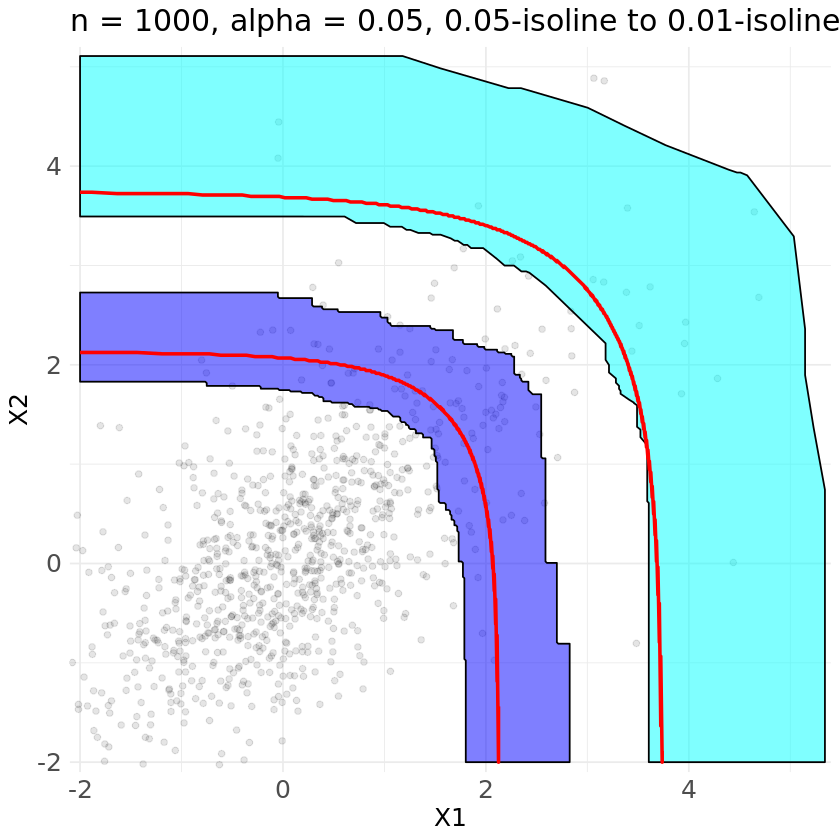

In [103]:
confregpath <- '/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create/bivt/500gticks_-2lb_5ub_rollingwindow/1000n_500B_500gticks_-2lb_5ub_bivt_empirical/simulation_4.RData'
confreg <- readRDS(confregpath)

ind <- 17

isopoly <- concaveman(as.matrix(setdiff(confreg[[ind]]$Cu, confreg[[ind]]$Cl)), length_threshold=0.01)
ggplot() + geom_point(data=confreg[[ind]]$dat, aes(x=X1, y=X2), alpha = 0.1) + 
geom_polygon(data=data.frame(isopoly), aes(x=V1, y=V2), fill = 'blue', color = 'black', alpha = 0.5) + 
geom_polygon(data=data.frame(projregion_poly[[1]]), aes(x=X1, y=X2), fill = 'cyan', color = 'black', alpha = 0.5) +
geom_line(data=isolines[['0.05']]$isoline, aes(x=X1, y=X2), color='red', size=1) +
geom_line(data=isolines[['0.01']]$isoline, aes(x=X1, y=X2), color='red', size=1) + scale_x_continuous(limits=c(-2.1, 5.4), expand=c(0,0)) + 
scale_y_continuous(limits=c(-2.1, 5.2), expand=c(0,0)) + ggtitle('n = 1000, alpha = 0.05, 0.05-isoline to 0.01-isoline') +  theme_minimal() + theme(
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      text = element_text(size = 15))